### Neural Networks

 - Basically a set of inter-connected nodes or neurons or perceptrons.
     - Typically consists of layers of such neurons.
     - Each neuron in a given layer is connected to all the neurons of the previous layers through a weight and an activatio function.
     - Activation function is used to generate the non-linearity in the model that is to be trained with the data in hand.
 Let us first consider how a single layer neural network would look like. For our purposes let's consider our input to be a three dimensional vector. For example let's say we are monitoring the Pressure, temperature and humidity at a weather station. the vector is $\vec{V}=\left(P, T, H\right)$. We would also need the label or the output. In this case this can be the chances of rain, $R$.

<img src="images/linearneuralnetwork.PNG" width="500" height="250">


$R'$ is the output of the untrained linear neural net and is given by:

\begin{equation}
R'=1\times w_0+P\times w_1+T\times w_2+H\times w_3
\end{equation}

The difference between the output of the untrained model, $R'$ and the actual value $R$, a function of the difference $\Delta=f\left(R-R'\right)$, known as the loss or the cost function is used to optimize the weights $w_i$ using optimization methods such as Gradient Descent. Note that we have a node to denote the offset whose input is always $1$ (weight given by $w_0$). As a rule of thumb, in the final representation and as well counting the number of neurons in each layer the node denoting the offset is mostly omitted. In the above example the neural network has single layer with three neurons. 

### Training a linear model using a  neural network

- We will try to first model a simple linear equation using a single layer neural network.
    - $y=3x+5$
    - The neural net model would look like $y'= w_0+w_1x$
    
We will first simulate some of the data:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
x = np.arange(0, 5, 0.5)

In [11]:
y = 3*x+5 #+ .001*np.random.randn(len(x))

Text(0,0.5,'y')

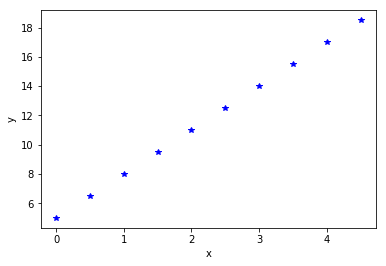

In [12]:
plt.plot(x, y, 'b*')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
x = np.float32(x.reshape(-1, 1))
y = np.float32(y.reshape(-1, 1))

In [14]:
#Importing torch
import torch
import torch.nn as nn
from torch.autograd import Variable

In [15]:
#Create a class for the training
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_dim = input_size
        self.output_dim = output_size
        self.linear = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        output = self.linear(x)
        return output

In [16]:
#Instantiate the model
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

What else is required?

- A loss function, in order to compare the output of the neural network to the real life value (in our case simulated y)
- A simple loss function would be the mean squared error:
    - $MSE = \frac{1}{n}\Sigma_i\left(\hat{y}_i-y_i\right)^2$
        - $\hat{y}_i$: predicted value
        - $y_i$: true value

In [17]:
#Define the loss function
criterion = nn.MSELoss(reduction='mean')

However learning still needs to takes place. The learning takes place by feeding back the loss function to the parameters in such a way that the loss function is minimized. 

- $\theta := \theta - \eta.\nabla_{\theta}$, where 
    - $\theta$ represents the parameters, 
    - $\eta$ is the learning rate
    - $\nabla_{\theta}$ is the gradient of the loss function w.r.t. $\theta$
- What are the parameters in this case?
    - $\alpha$ and $\beta$ in $y=\alpha x + \beta$
    - After successful learning we should obtain: $\alpha=3$, $\beta=5$

In [18]:
#Define learning rate
lr = 0.1
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Now it is time to train. A few points before training:

- Generally once has to go through the dataset several time in order to properly optimize the weights, we fix the number of 'epochs' initially
- Since the inputs will generally be numpy array we have to convert them into torch tensors first.
- While going through each epoch, we compute the outputs and obtain the loss.
- The loss is then used to compute the gradients which will be used to update the parameters

In [19]:
nb_epoch = 100

In [20]:
epoch=0
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(x))
    labels = Variable(torch.from_numpy(y))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    print('Epoch {},  Loss: {}'.format(epoch, loss.data))

Epoch 1,  Loss: 114.1458511352539
Epoch 2,  Loss: 40.75569152832031
Epoch 3,  Loss: 16.35734748840332
Epoch 4,  Loss: 8.05331802368164
Epoch 5,  Loss: 5.056278705596924
Epoch 6,  Loss: 3.826961040496826
Epoch 7,  Loss: 3.2023239135742188
Epoch 8,  Loss: 2.798548936843872
Epoch 9,  Loss: 2.4875075817108154
Epoch 10,  Loss: 2.2251219749450684
Epoch 11,  Loss: 1.9950758218765259
Epoch 12,  Loss: 1.7903472185134888
Epoch 13,  Loss: 1.6071312427520752
Epoch 14,  Loss: 1.4428300857543945
Epoch 15,  Loss: 1.2953797578811646
Epoch 16,  Loss: 1.1630163192749023
Epoch 17,  Loss: 1.0441830158233643
Epoch 18,  Loss: 0.9374939799308777
Epoch 19,  Loss: 0.8417062759399414
Epoch 20,  Loss: 0.7557060718536377
Epoch 21,  Loss: 0.6784930229187012
Epoch 22,  Loss: 0.6091689467430115
Epoch 23,  Loss: 0.5469277501106262
Epoch 24,  Loss: 0.49104633927345276
Epoch 25,  Loss: 0.4408746063709259
Epoch 26,  Loss: 0.3958286941051483
Epoch 27,  Loss: 0.35538533329963684
Epoch 28,  Loss: 0.3190743625164032
Epoch 2

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[3.0067]], requires_grad=True), Parameter containing:
 tensor([4.9795], requires_grad=True)]

In [22]:
with torch.no_grad():
    predicted = model.forward(inputs).data.numpy()

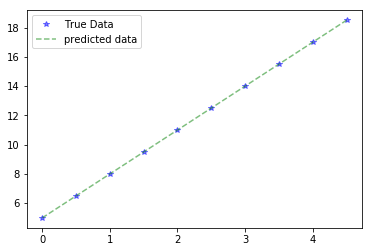

In [23]:
plt.plot(x, y, 'b*', label='True Data', alpha=0.5)
plt.plot(x, predicted, 'g--', label = 'predicted data', alpha=0.5)
plt.legend(loc='best')

### Loss 

Loss is way to estimate how much the predicted output is different from the actual value (in case of regression) and label (in case of classification). The loss is also often called cost function. 

In case of regression a common cost function would be the Mean Square Loss. Suppose we define our model as $h_{\theta}\left(x\right)$ then we define the loss function as :

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^{n} \left(h_{\theta}\left(x^i\right)-y^i\right)^2
\end{equation}
where $x^i$ are the risen incidents.



### What about non-linearity?

The above example was about linear regression and hence a linear model could easily model the sample data. However we want to be able to data that is non-linear as well. Non-linearity is introduced in Neural networks through what are known as activation function. A well known activation function is the Sigmoid function which is given by :

\begin{equation}
S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1}
\end{equation}

If you plot the sigmoid function this is what it looks like:

In case of a classification problem, this loss function described above for the problem of regression will not give us much information. Consider the case when we consider the output of a binary classifier. The loss function used in this case is of the form:

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^n\left[y^ilogh\left(x^i\right)+\left(1-y^i\right)log\left(i-h\left(x^i\right)\right)\right]
\end{equation}


In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

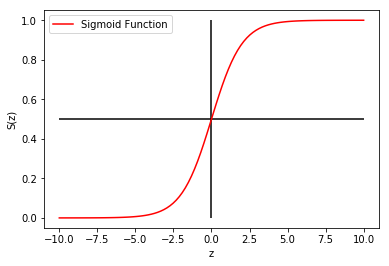

In [25]:
z = np.linspace(-10, 10, num=100 )
plt.plot(z, sigmoid(z), 'r-', label='Sigmoid Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.hlines(y=0.5, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=1)

#### ReLU activation
There are a few other popular activation functions as well. A particularly popular one is the ReLU (Rectified Linear Unit ) activation which looks like:

\begin{equation}
R\left(x\right) = max(x, 0)
\end{equation}

In [26]:
def relu(x):
    return max(x,0.0)

In [27]:
relu_vec = np.vectorize(relu)

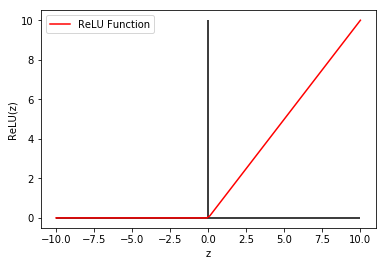

In [28]:
z = np.linspace(-10, 10, num=100)
plt.plot(z, relu_vec(z), 'r-', label='ReLU Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.hlines(y=0, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=10)

In order to enable non-linearity in our models we apply activation function to each node or neuron of a layer.

<img src="images/linearneuralnetworkplusactivation.PNG" width="500" height="250">

In the above diagram we see the activation function applied to the final layer which has a single neuron in it. In general, activation functions are applied to all the neurons in each layer, with each neuron being applied an activation function. 

In order to maximize the effectiveness of neural network we need to add more layers of network. This combined with the activation function will allow us to model complex data which has non-trivial relationship between the features and the labels:

<img src="images/multilayerneuralnet.png" width="500" height="250">

#### Softmax activation
The softmax activation function is another highly popular activation function which is usually used in the final layer when doing multiclass-classification using neural networks. Suppose we want to apply softmax to the output of a neural network classfier trying to classify 10 types of images with classes $k=1,2..10$. The output layer would thus have 10 layers. The softmax activated output for the i$^{th}$ neuron of the final layer would be thus given by 


\begin{equation}
P\left(y=2|x\right) = \frac{e^{x^Tw_j}}{\Sigma_k e^{x^Tw_k}}
\end{equation}

#### Backpropagation

As we can see that a neural network can very complicated and perform parameter updates (here the weight $w_{ij}$), we will need to compute the gradient at each node. This is known as backpropagation as the error obtained by comparing the output with the actual value using a loss function is then used to compute the gradients of the parameters. 

#### Basic classfication using Neural Networks

Let us try some basic classification using neural networks. For this purposes I will use a very popular dataset, the breast cancer diagnostics dataset origically sourced from the University of Wisconsin.

In [29]:
from sklearn.datasets import load_breast_cancer

In [30]:
data = load_breast_cancer()

In [35]:
df = pd.DataFrame(data=data.data, columns=list(data.feature_names))

In [36]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Before we start modeling, we need to split the data into training and test sets in order to have an independent verification of our model. This functionality available in the sklearn package.

In [154]:
X = np.float32(data.data)
y = np.float32(data.target).reshape(-1, 1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# y = lb.fit_transform(y.reshape(-1,1))
y = y.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
y.shape

(569, 1)

In [156]:
import torch.nn.functional as F

In [182]:
#Create a class for the training
class Classification(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(30, 60)
        self.dropout1 = nn.Dropout(p=0.05)
        self.linear2 = nn.Linear(60, 120)
        self.dropout2 = nn.Dropout(p=0.05)
        self.linear3 = nn.Linear(120, 60)
        self.dropout3 = nn.Dropout(p=0.05)
        self.linear4 = nn.Linear(60, 10)
        self.dropout4 = nn.Dropout(p=0.05)
        self.linear5 = nn.Linear(10, 1)
    def forward(self, x):
        output = F.relu(self.linear1(x))
        output = self.dropout1(output)
        output = F.relu(self.linear2(output))
        output = self.dropout2(output)
        output = F.relu(self.linear3(output))
        output = self.dropout3(output)
        output = F.relu(self.linear4(output))
        output = self.dropout4(output)
        output = torch.sigmoid(self.linear5(output))
        return output

In [183]:
#Initializing the model
model = Classification()
#Setting the loss 
criterion = nn.BCELoss()
#Define learning rate
lr = 0.005
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [184]:
from sklearn.metrics import roc_auc_score
nb_epoch = 500
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
#     print(outputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    with torch.no_grad():
        prob = model.forward(inputs)
        score = roc_auc_score(labels, prob)
    
    print('Epoch {},  ROC_AUC: {}'.format(epoch, score))

Epoch 1,  ROC_AUC: 0.7561343981462324
Epoch 2,  ROC_AUC: 0.28795464890139444
Epoch 3,  ROC_AUC: 0.16979765796333843
Epoch 4,  ROC_AUC: 0.3005337857408863
Epoch 5,  ROC_AUC: 0.4327388587743617
Epoch 6,  ROC_AUC: 0.5386891215293582
Epoch 7,  ROC_AUC: 0.5746472462448794
Epoch 8,  ROC_AUC: 0.601336533289196
Epoch 9,  ROC_AUC: 0.6343153887532587
Epoch 10,  ROC_AUC: 0.6555840609095046
Epoch 11,  ROC_AUC: 0.6569909380560268
Epoch 12,  ROC_AUC: 0.6356084743658709
Epoch 13,  ROC_AUC: 0.6814768072164522
Epoch 14,  ROC_AUC: 0.6995489717383209
Epoch 15,  ROC_AUC: 0.7040178756155087
Epoch 16,  ROC_AUC: 0.6536909835726403
Epoch 17,  ROC_AUC: 0.7221417635618819
Epoch 18,  ROC_AUC: 0.7418380436131915
Epoch 19,  ROC_AUC: 0.7364588074647246
Epoch 20,  ROC_AUC: 0.77857201969628
Epoch 21,  ROC_AUC: 0.7935407787478793
Epoch 22,  ROC_AUC: 0.7710100550337238
Epoch 23,  ROC_AUC: 0.7695617991475979
Epoch 24,  ROC_AUC: 0.7693445607646792
Epoch 25,  ROC_AUC: 0.8045889022220383
Epoch 26,  ROC_AUC: 0.7833926428600

Epoch 212,  ROC_AUC: 0.9647453138577399
Epoch 213,  ROC_AUC: 0.9645797988993255
Epoch 214,  ROC_AUC: 0.9632556792320106
Epoch 215,  ROC_AUC: 0.9683142301485497
Epoch 216,  ROC_AUC: 0.9664004634418837
Epoch 217,  ROC_AUC: 0.9640625646542806
Epoch 218,  ROC_AUC: 0.9673521744527662
Epoch 219,  ROC_AUC: 0.975772747962097
Epoch 220,  ROC_AUC: 0.9658832291968387
Epoch 221,  ROC_AUC: 0.96624529316837
Epoch 222,  ROC_AUC: 0.9682418173542433
Epoch 223,  ROC_AUC: 0.9646625563785327
Epoch 224,  ROC_AUC: 0.9600902056523358
Epoch 225,  ROC_AUC: 0.9669383870567303
Epoch 226,  ROC_AUC: 0.965759092978028
Epoch 227,  ROC_AUC: 0.9592626308602639
Epoch 228,  ROC_AUC: 0.9696900732403692
Epoch 229,  ROC_AUC: 0.9611143294575248
Epoch 230,  ROC_AUC: 0.9662349484834692
Epoch 231,  ROC_AUC: 0.962810857781272
Epoch 232,  ROC_AUC: 0.9626970662473622
Epoch 233,  ROC_AUC: 0.9656349567592171
Epoch 234,  ROC_AUC: 0.9635039516696321
Epoch 235,  ROC_AUC: 0.9614039806347499
Epoch 236,  ROC_AUC: 0.9683659535730542
Epoch

Epoch 422,  ROC_AUC: 0.972327967890098
Epoch 423,  ROC_AUC: 0.9772416932180245
Epoch 424,  ROC_AUC: 0.9730003724086563
Epoch 425,  ROC_AUC: 0.9716762527413415
Epoch 426,  ROC_AUC: 0.9705383374022428
Epoch 427,  ROC_AUC: 0.9733210576405843
Epoch 428,  ROC_AUC: 0.9730003724086563
Epoch 429,  ROC_AUC: 0.9716762527413416
Epoch 430,  ROC_AUC: 0.9733314023254852
Epoch 431,  ROC_AUC: 0.9673211403980635
Epoch 432,  ROC_AUC: 0.9747382794720073
Epoch 433,  ROC_AUC: 0.9759796416601151
Epoch 434,  ROC_AUC: 0.9685314685314685
Epoch 435,  ROC_AUC: 0.9746141432531965
Epoch 436,  ROC_AUC: 0.974065874953449
Epoch 437,  ROC_AUC: 0.9665452890304961
Epoch 438,  ROC_AUC: 0.9719141804940622
Epoch 439,  ROC_AUC: 0.9759175735507096
Epoch 440,  ROC_AUC: 0.9686762941200812
Epoch 441,  ROC_AUC: 0.9680142342864237
Epoch 442,  ROC_AUC: 0.9735589853933049
Epoch 443,  ROC_AUC: 0.9698038647742789
Epoch 444,  ROC_AUC: 0.9659866760458478
Epoch 445,  ROC_AUC: 0.9718210783299541
Epoch 446,  ROC_AUC: 0.9693280092688378
Ep

In [186]:
from sklearn.metrics import roc_curve

Let us look at the roc curve of the model especially over the test data

In [215]:
#computing the ROC curve
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_test))
    fpr, tpr, _ = roc_curve(y_test, probs.numpy())
    roc_score = roc_auc_score(y_test, probs.numpy())

Text(0,0.5,'TPR')

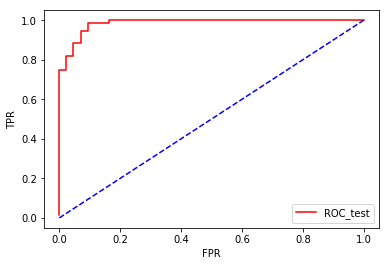

In [216]:
plt.plot(fpr, tpr, 'r-', label='ROC_test')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [217]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.9849328529315426


In [218]:
#computing the ROC curve
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_train))
    fpr, tpr, _ = roc_curve(y_train, probs.numpy())
    roc_score = roc_auc_score(y_train, probs.numpy())

Text(0,0.5,'TPR')

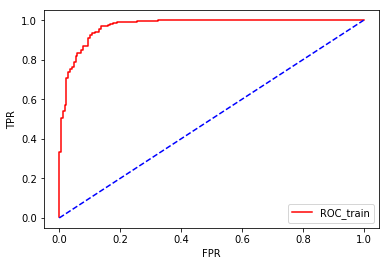

In [219]:
plt.plot(fpr, tpr, 'r-', label='ROC_train')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [220]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.9695245582819547
